In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import kurtosis
import seaborn as sns

In [4]:
data = pd.read_excel(r"C:\Users\rakes\Documents\Raq files\Data Science\Data sets\INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")

In [3]:
pd.set_option('display.max_columns',28)
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [31]:
for col in data:
    print(col)
    print(data[col].unique())

EmpNumber
['E1001000' 'E1001006' 'E1001007' ... 'E100994' 'E100995' 'E100998']
Age
[32 47 40 41 60 27 50 28 36 38 44 30 29 42 34 39 56 53 35 52 33 25 45 23
 26 54 37 24 49 55 43 51 22 31 58 20 21 48 19 18 59 46 57]
Gender
['Male' 'Female']
EducationBackground
['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
MaritalStatus
['Single' 'Married' 'Divorced']
EmpDepartment
['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
EmpJobRole
['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Research Director'
 'Manager R&D' 'Finance Manager' 'Technical Architect' 'Business Analyst'
 'Technical Lead' 'Delivery Manager']
BusinessTravelFrequency
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DistanceFromHome
[10 14  5 16  8  1 24  3 2

# Bivariate  analysis

In [15]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

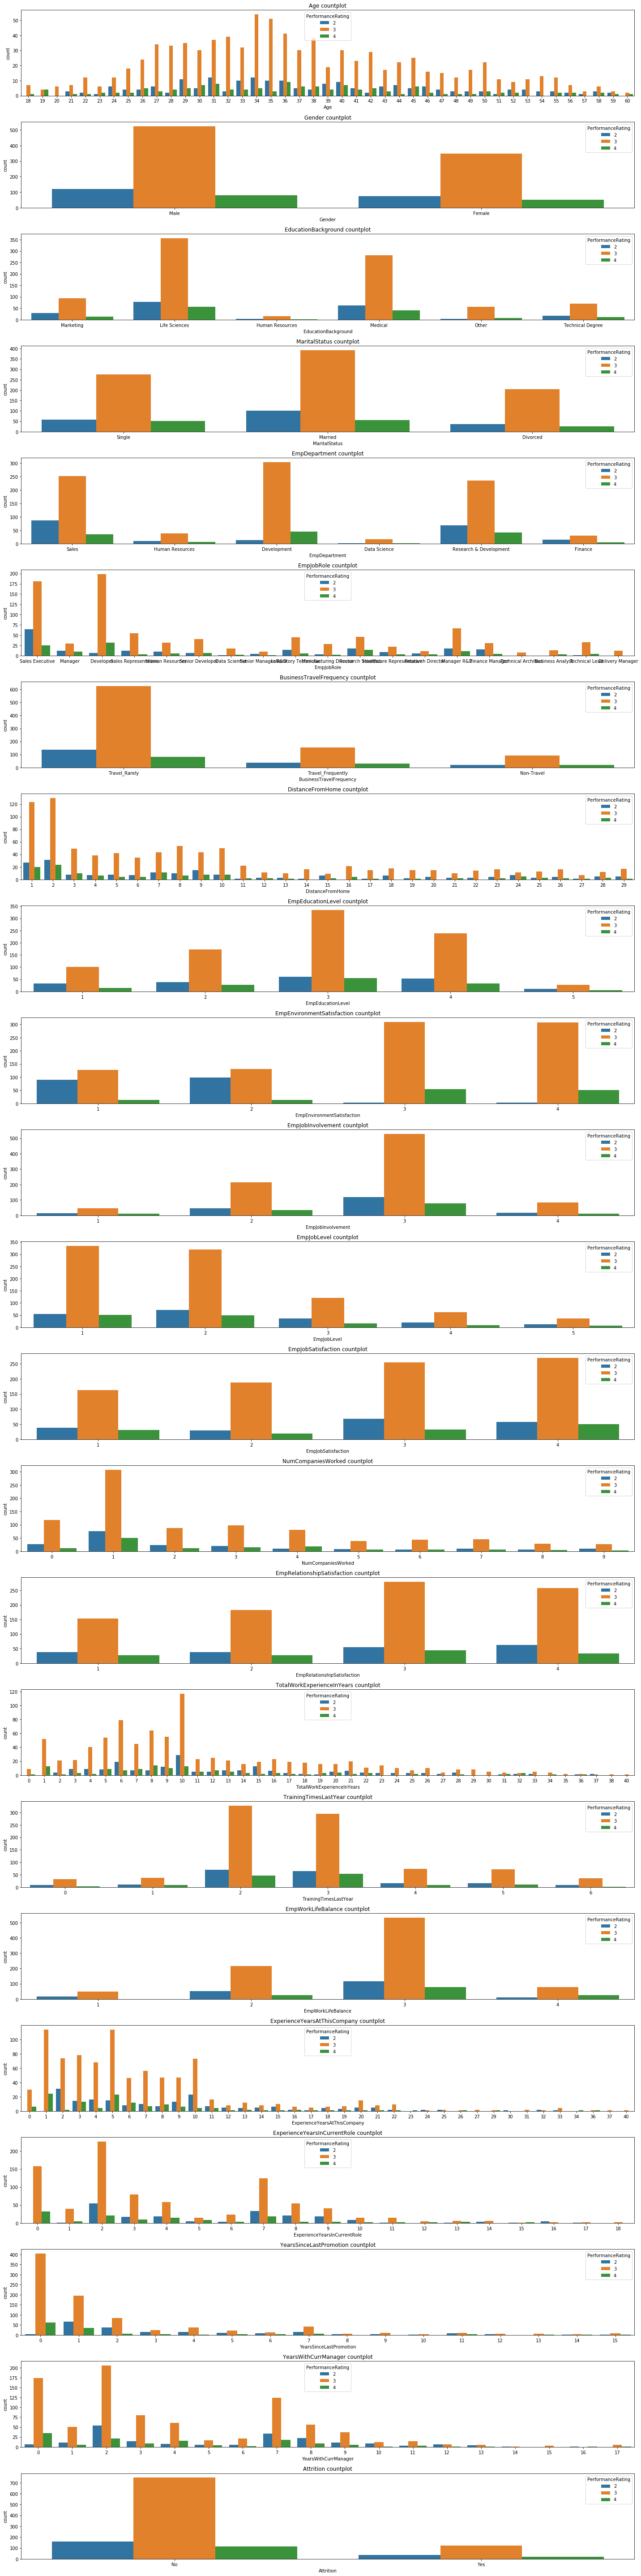

In [23]:
plt.figure(figsize = (20,80))

categorical_list = ['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel','EmpEnvironmentSatisfaction','EmpJobInvolvement', 'EmpJobLevel','EmpJobSatisfaction','NumCompaniesWorked', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', ]

for i,item in enumerate(categorical_list):
    x_axis = item
    fig_num = 1*i+1
    plt.subplot(23,1,fig_num)
    plt.title(x_axis+' countplot')
    sns.countplot(data[x_axis], hue= data["PerformanceRating"])
    plt.tight_layout()

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64


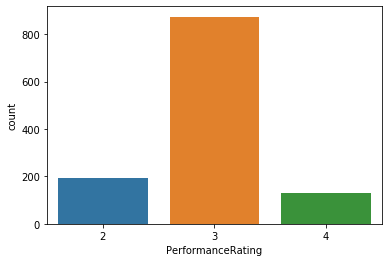

In [13]:
print(data['PerformanceRating'].value_counts())
sns.countplot(data['PerformanceRating'])
plt.show()

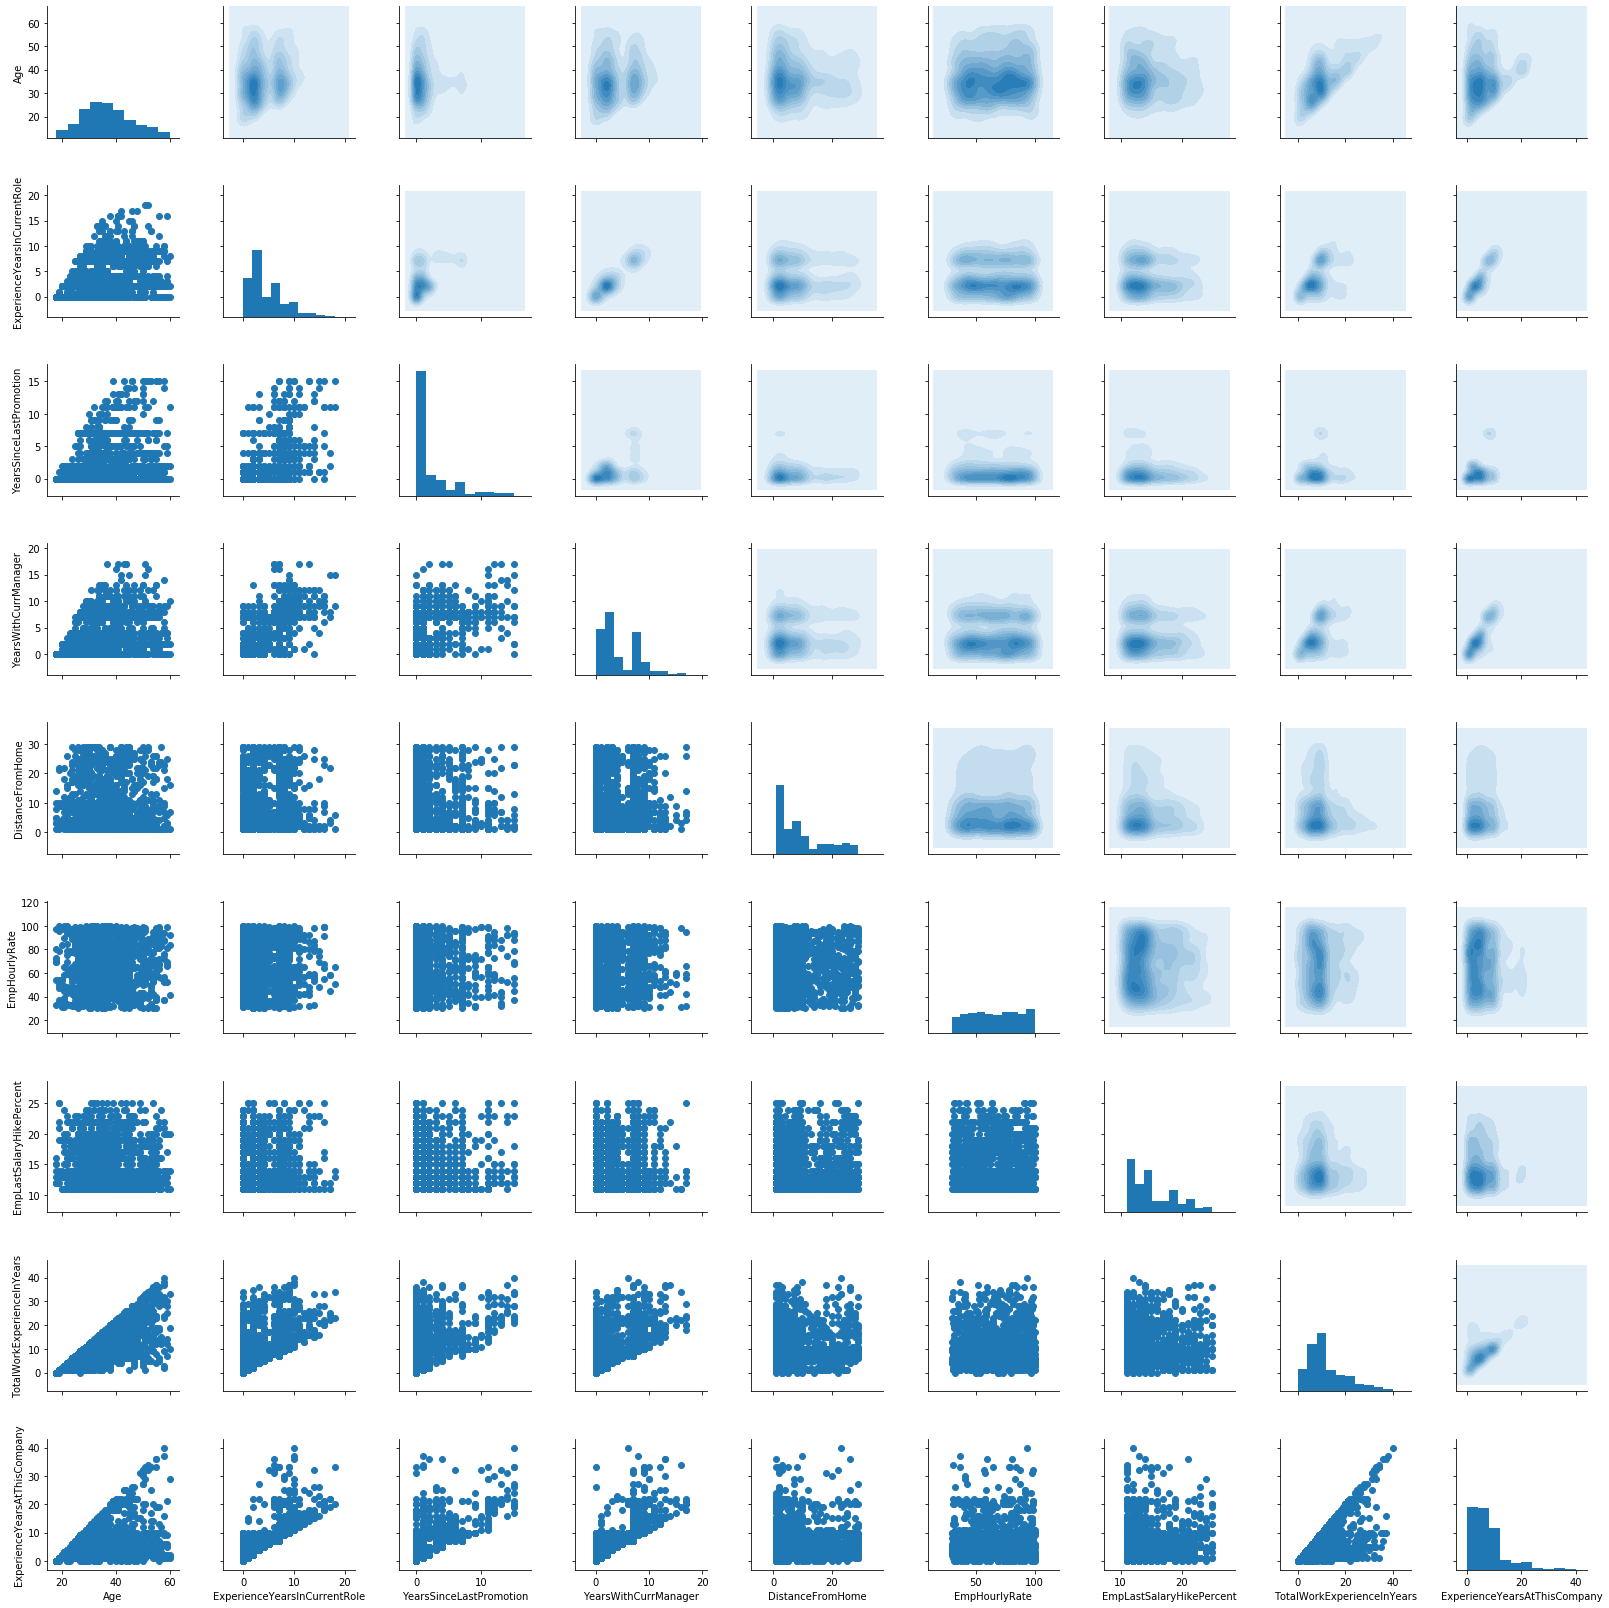

In [30]:
emp_demo = data.loc[:,["Age",'MaritalStatus','ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','DistanceFromHome','EmpHourlyRate',
                        'EmpLastSalaryHikePercent','TotalWorkExperienceInYears','ExperienceYearsAtThisCompany']]
#sns.pairplot(emp_demo, hue='BusinessTravelFrequency',height = 2.5)
g = sns.PairGrid(emp_demo )
g.map_diag(plt.hist )
g.map_upper(sns.kdeplot, levels = 10,shade = True)
g.map_lower(plt.scatter)

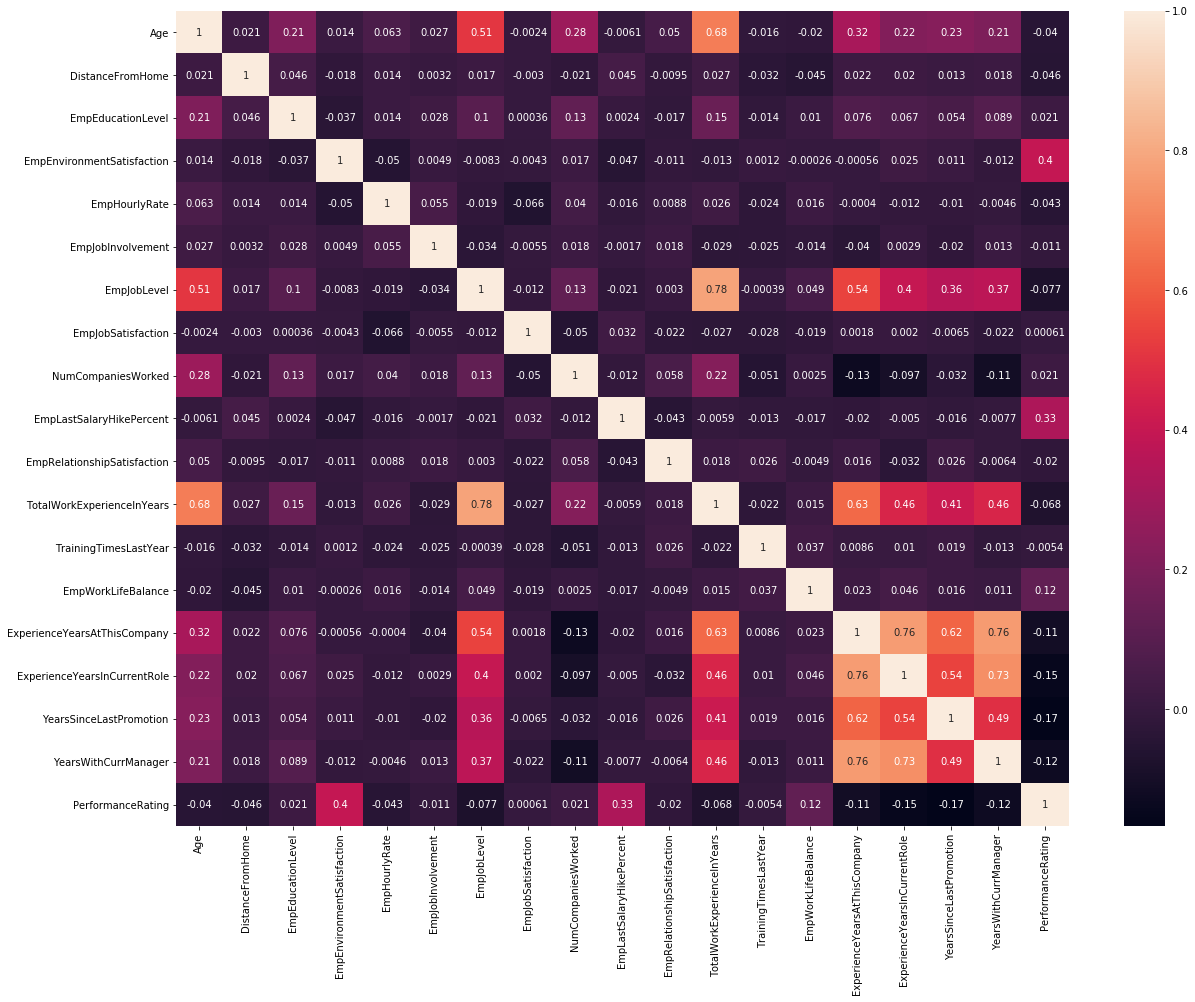

In [27]:
corr = data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot = True)
plt.show()

In [32]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [35]:
data.pivot_table(index=["PerformanceRating"], values= ["OverTime","EmpLastSalaryHikePercent", "TotalWorkExperienceInYears"], aggfunc=np.mean)

,EmpLastSalaryHikePercent,TotalWorkExperienceInYears
PerformanceRating,,
2,15.072165,12.752577
3,14.427918,11.076659
4,20.704545,10.916667
